
# MODEL PROJECT
## Model Description

**Purpose**: This model describes the spread of an infectious disease and can be used to make important policy decisions when faced with an epidemic or pandemic, such as the covid-19 pandemic. Further, it can be used as a tool to see how diseases affect the behaviour of housholds regarding consumption. This model was also used by the "Økonomiske Råd" during covid when analyzing the effect of the pandemic on the economy. SIR models have recieved increased attention due to the pandemic. 

**Set up**: The population is divided into three different groups. 
- Susceptible ($S$), those who possible can get the disease
- Infectious ($I$), those who are infected by the disease and thus can spread it to other people
- Recovered ($R$), those who have gone through sickness and are assumed to be immune and cannot get disease again
- Population size ($N$) is equal to $N = S + I + R$. We assume that it is constant over time, even though there is also deaths due to the disease. 
- $\beta$ is the infection rate. Indicating the probability of becoming infected when you have been in contact with an infected person.
- $\gamma$ is the recovery rate, indicating how long it takes before the person is recoves and is immune against new infections. 
- $\mu$ is the mortality rate of the disease. 
- $dS_{v}/dt$ is the vaccination rate
- $V$ represents how many individuals are vaccinated. 

The model can be expressed by these equations: 

**Equations**: 
$$\begin{aligned}
\frac{dS}{dt} &= -\frac{\beta S I}{N} - \frac{dS_{v}}{dt} \\
\frac{dI}{dt} &= \frac{\beta S I}{N} - (\gamma + \mu) I \\
\frac{dR}{dt} &= \gamma I \\
\frac{dD}{dt} &= \mu I \\
\frac{dV}{dt} &= \frac{dS_{v}}{dt}
\end{aligned}$$

The first equation indicates how fast people get infected. The second represents the change in the number of infectious individuals, taking into account the infection rate and the recovery rate, and lastly also the mortality rate. The fourth equation represents the recovery rate. The fifth equation represents the vaccination rate. 

## Solving the model
### Without a Vaccination Program

As can be seen in the following graph, witha given description of the state of the world and of the virus, out model is able to illustrate how the infection will spread in the population before. As can be seen, the re will be a natural herd immunity, however, the difference between the two states comes more to show when comparing to the state with vaccines. 

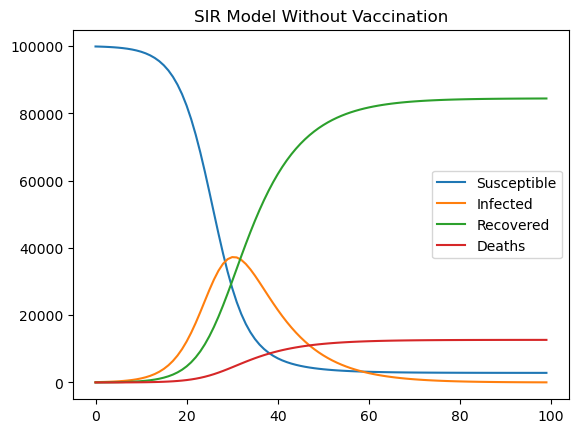

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
%reload_ext autoreload
from modelproject import SIRModel3

# Create an instance of the SIRModel3 class with the desired parameter values
model = SIRModel3(population=100000, infection_rate=0.4, recovery_rate=0.1, initial_infected=100, mortality_rate=0.015, vaccination_rate=0.1)

# Simulate the model without vaccination for 100 days and plot the results
model.plot_novax(num_days=100)



### Model with a Vaccine Program
when introducing the vaccine program we can see that we are able to 'flatten the curve'. All variables will decrease except mortality rate. This is explained by the simplicity of out model. It would be ideal and more realistic if the mortality rate was not given exogenously, but endogenously. 

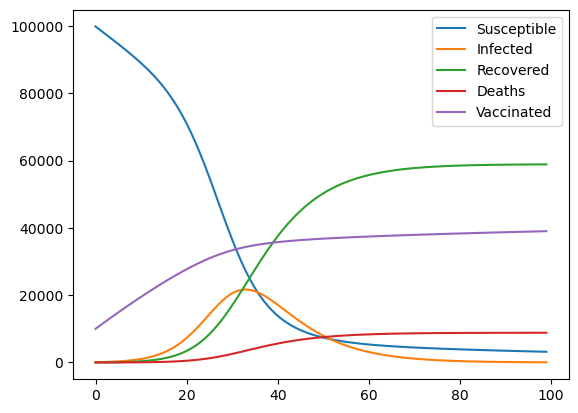

In [144]:
# Simulate the model with vaccination for 100 days and plot the results
model.plot(num_days=100, vaccination_rate=0.01)


### Optimization of Vaccination rate to minimize deaths. 
The code find the vaccination rate that minimizes the mortality. The optimal vaccination rate that was obtained from the 'optimize_vaccination_rate` method is 0.999, which means that vaccinating almost the entire population is the best way to minimize the total number of deaths over the 100-day period. This is not surprising, as vaccination is one of the most effective measures to prevent the spread of infectious diseases.

The total number of deaths with the optimal vaccination rate is 18.25, which is a relatively small number compared to the size of the population (1,000,000) and the initial number of infected people (100). This is a testament to the effectiveness of the vaccination strategy in controlling the spread of the disease.

It is worth noting that the model assumes a constant vaccination rate over the 200-day period. In reality, the vaccination rate may vary over time due to factors such as vaccine availability, public perception, and government policies. Therefore, the optimal vaccination rate obtained from the model should be taken as a guideline rather than a definitive answer.

By adding more variables to the model, the optimal vaccination rate would become more realistic. Also, the cost of the vaccine could have been included in order to measure the effect of the vaccine vs. the cost of it. 

In [148]:
optimal_vaccination_rate = model.optimize_vaccination_rate(num_days=100)
print("Optimal vaccination rate:", optimal_vaccination_rate.x)
print("Total deaths with optimal vaccination rate:", model.total_deaths(num_days=100, vaccination_rate=optimal_vaccination_rate.x))

Optimal vaccination rate: 0.9999939459326207
Total deaths with optimal vaccination rate: 18.252909861007275


## Conclusion 
In this project we have made a SIR-model that models the spread of an infectious disease wihtin a population. We extended the model to include vaccines and found the optimal vaccination rate. A possible extension to the model would be to add more variables in order for the model to be more precise or to model a shock where the disease got either more deadly or more infectious. 
